In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, cross_validation

In [45]:
data = list(np.loadtxt('../data/hypoxic_area.dat').T) # a list of arrays of each variable
y = data.pop(1) # Pull out the observation to be modeled, "Hypoxic Area"
X = np.array(data).T
X_variable_names = ["Year", "Streamflow", "N-Load", "N-concentration", "U-wind"]

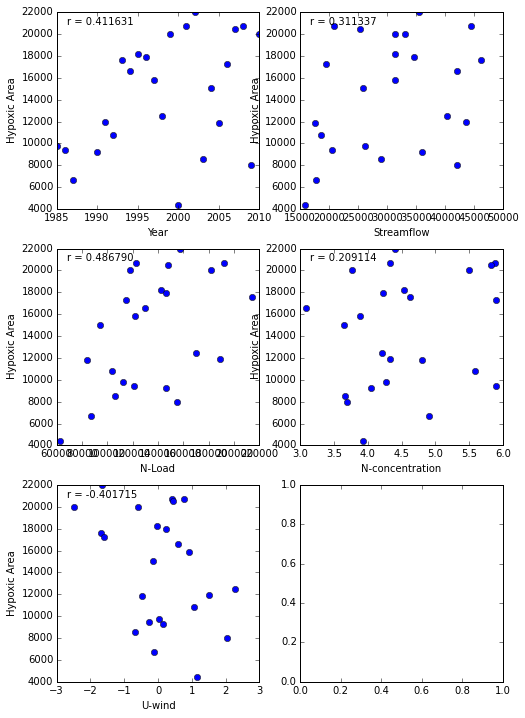

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
for Nvar in range(5):
    ax = axs.flatten()[Nvar]
    ax.plot(X[:, Nvar], y, 'o')
    ax.set_ylabel('Hypoxic Area')
    ax.set_xlabel(X_variable_names[Nvar])
    r = np.corrcoef(X[:, Nvar], y)[0,1]
    plt.text(0.05, 0.95, 'r = %f' % r, horizontalalignment='left',
             verticalalignment='center',
             transform=ax.transAxes)


In [69]:
Xs = preprocessing.scale(X)
ys = preprocessing.scale(y)
lm = linear_model.ElasticNetCV(cv=3)
lm.fit(Xs, ys)
print(lm.coef_)

[ 0.18182983  0.          0.27659505  0.0154327  -0.18547857]


In [70]:
cross_validation.cross_val_score(lm, Xs, ys, cv=4)

array([-13.3739366 , -10.76578001,   0.30976368,   0.10878269])